# Importing libraries

In [1]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.2/34.2 MB 13.9 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
from tensorflow import keras
import rdkit
import torch

# Checking the versions of installed libraries
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)
print("RDKit version:", rdkit.__version__)
print("PyTotch version:", torch.__version__)

TensorFlow version: 2.17.1
Keras version: 3.5.0
RDKit version: 2024.09.4
PyTotch version: 2.5.1+cu121


In [3]:
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [4]:
#Importing RDKit methods
import warnings

import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem, PandasTools, MACCSkeys, AtomPairs, rdFingerprintGenerator, rdMolDescriptors
from rdkit import DataStructs
from rdkit.Avalon import pyAvalonTools
from rdkit.Chem.AtomPairs.Pairs import GetAtomPairFingerprintAsBitVect

pd.set_option('display.max_rows', None)
warnings.filterwarnings("ignore")

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing data

,Unnamed: 0,Name,Smiles,Ka_mean,mol
0,0,cyclododecylammonium,[NH3+]C1CCCCCCCCCCC1,52000.0,
1,1,"4-(1,1-dimethylpiperidin-1-ium-4-yl)-1,1-dimet...",C[N+]1(C)CCC(CC1)C1CC[N+](C)(C)CC1,45000000.0,
2,2,norbornan-2-ylammonium,[NH3+]C1CC2CCC1C2,640000.0,
3,3,trimethylsilylmethylammonium,C[Si](C)(C)C[NH3+],500000.0,
4,4,"[3,5-dimethyl-7-(trimethylammonio)-1-adamantyl...",CC12CC3(C)CC(C1)(CC(C2)(C3)[N+](C)(C)C)[N+](C)...,9200.0,
5,5,cyclooctylammonium,[NH3+]C1CCCCCCC1,720000.0,
6,6,cyclohexylammonium,[NH3+]C1CCCCC1,130000.0,
7,7,3-[benzyl(dimethyl)ammonio]propane-1-sulfonate,C[N+](C)(CCCS([O-])(=O)=O)CC1=CC=CC=C1,23300.0,
8,8,(3-hydroxy-1-adamantyl)ammonium,[NH3+]C12CC3CC(C1)CC(O)(C3)C2,37000.0,
9,9,trimethyl-[[4-[(trimethylammonio)methyl]phenyl...,C[N+](C)(C)CC1=CC=C(C[N+](C)(C)C)C=C1,16000000.0,

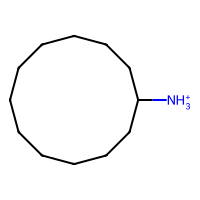
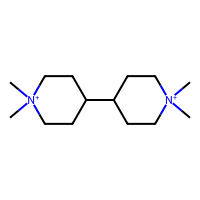
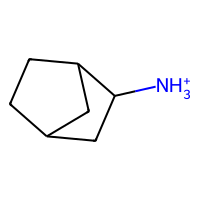
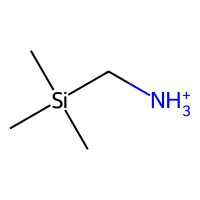
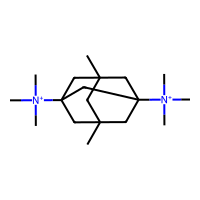
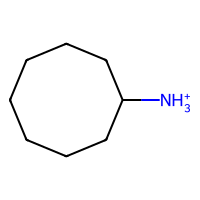
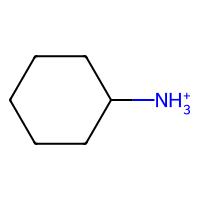
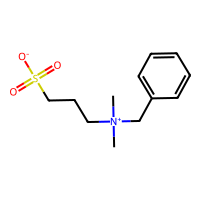
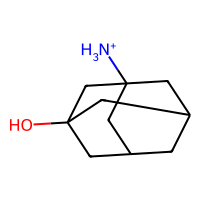
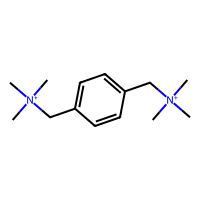
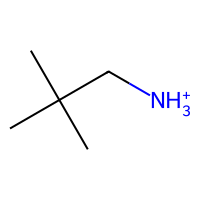
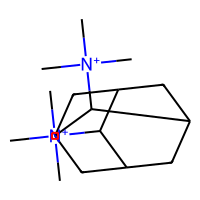
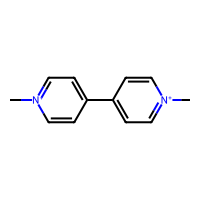
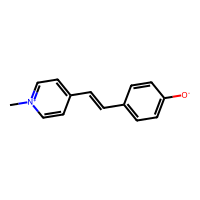
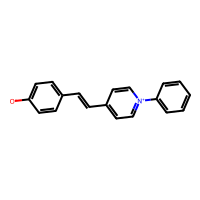
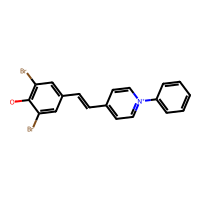
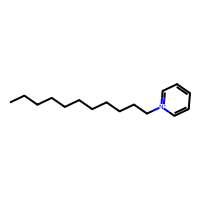
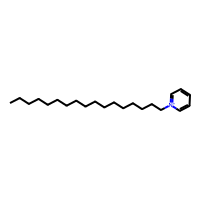
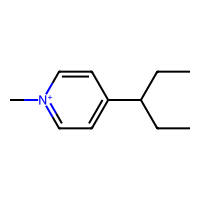
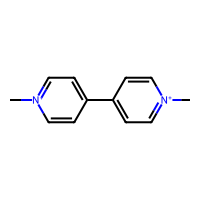
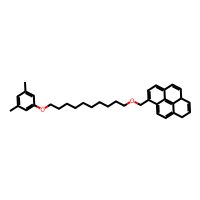
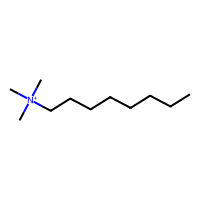
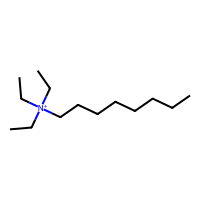
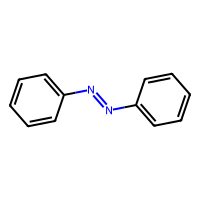
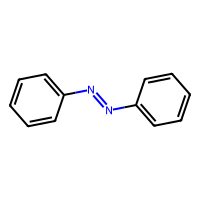
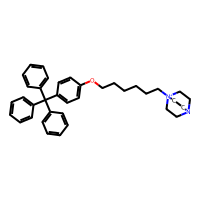
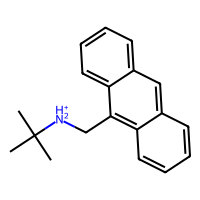
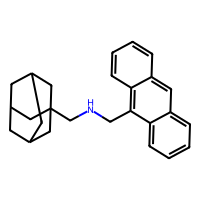
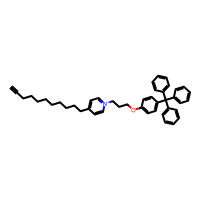
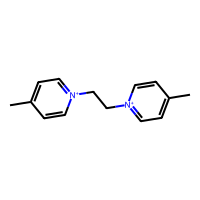
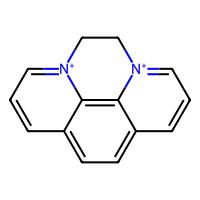
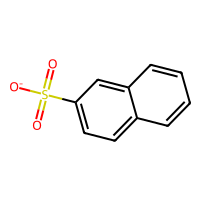
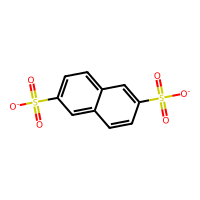

In [6]:
FULL_df = pd.read_csv("/content/drive/MyDrive/Files For Project/GuestsWP6++.csv")
FULL_df = FULL_df.drop(["mol"], axis = 1)
PandasTools.AddMoleculeColumnToFrame(FULL_df, 'Smiles', 'mol')
FULL_df

# Molecular Descriptors

### Creation

In [7]:
from rdkit.Chem import Descriptors
prop = [Descriptors.CalcMolDescriptors(mol) for mol in FULL_df["mol"]]
df_prop = pd.DataFrame(prop)
df = pd.concat([FULL_df, df_prop], axis = 1).drop(["Name", "mol", "Smiles", "Unnamed: 0"], axis = 1)
df.sample(3)

,Ka_mean,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
32,210000.0,10.801314,10.801314,0.360486,-4.562791,0.748428,12.777778,286.286,280.238,285.961677,...,0,0,0,0,0,0,0,0,0,0
17,326000.0,2.293903,2.293903,1.179659,1.179659,0.231773,11.000000,318.569,278.249,318.315527,...,0,0,0,0,0,0,0,0,14,0
15,105000.0,11.646595,11.646595,0.036330,-0.036330,0.551369,11.043478,431.127,418.023,428.936388,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#Quantity of molecular descriptors
len(list(df.columns)) - 1

217

### Analysis

In [9]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.0 MB/s eta 0:00:00


In [10]:
from catboost import CatBoostRegressor

In [11]:
from sklearn.model_selection import train_test_split
X = df.drop(["Ka_mean"], axis = 1)
Y = df["Ka_mean"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size=0.1, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
cb = CatBoostRegressor()
cb.fit(X_train, y_train, verbose=0)

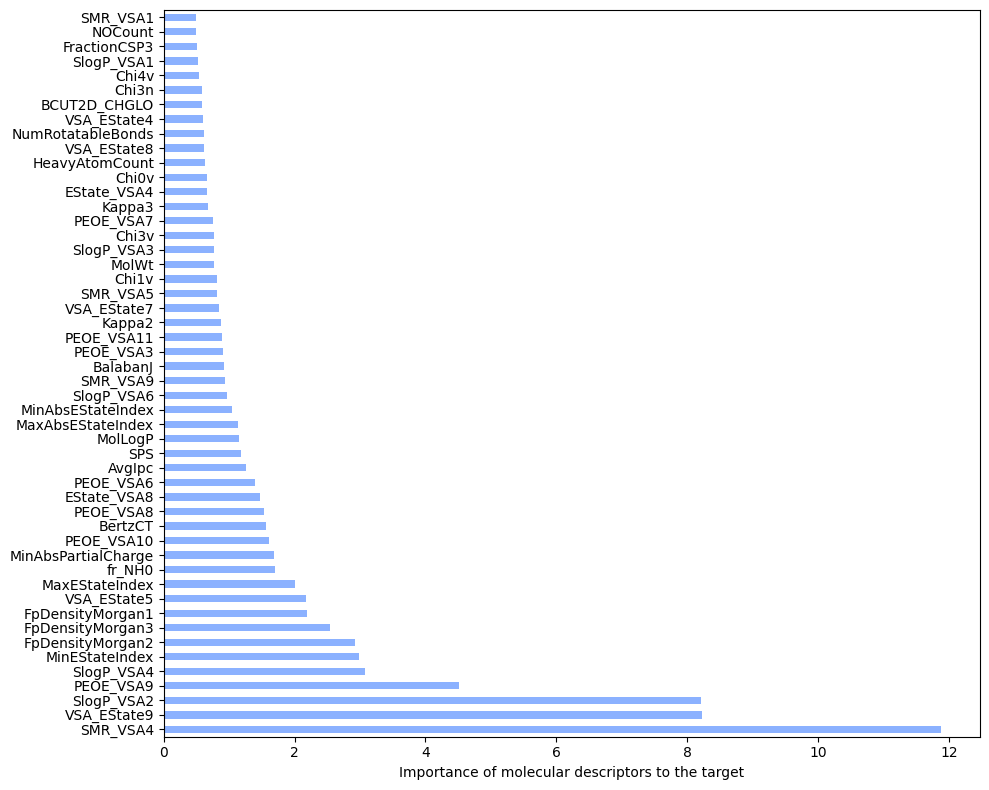

In [14]:
y_pred = cb.predict(X_test)

# Importance of molecular descriptors to the target
fig = plt.figure(figsize=(10,8))
feat_importances = pd.Series(cb.get_feature_importance(), index=X.columns)
feat_importances.nlargest(50).plot(kind='barh', color = '#5A91FF', alpha=0.7)
plt.xlabel('Importance of molecular descriptors to the target')
plt.tight_layout()

In [15]:
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feat_importances
})

# Sorting DataFrame by importance and choosing top-10 features
top_features_desc = importance_df.sort_values(by='Importance', ascending=False).head(10)

### Top-10 important descriptors

In [16]:
top_features_desc

,Feature,Importance
SMR_VSA4,SMR_VSA4,11.883457
VSA_EState9,VSA_EState9,8.227830
SlogP_VSA2,SlogP_VSA2,8.209678
PEOE_VSA9,PEOE_VSA9,4.507396
SlogP_VSA4,SlogP_VSA4,3.081658
MinEStateIndex,MinEStateIndex,2.985998
FpDensityMorgan2,FpDensityMorgan2,2.921754
FpDensityMorgan3,FpDensityMorgan3,2.540559
FpDensityMorgan1,FpDensityMorgan1,2.183134
VSA_EState5,VSA_EState5,2.180836


In [17]:
top_desc = list(top_features_desc["Feature"])

In [18]:
#Creating dataset only with relevant descriptors
DF = df[top_desc]
DF = DF.assign(Ka_mean = df["Ka_mean"])

### Normalization

In [65]:
DF.head(3)

,SMR_VSA4,VSA_EState9,SlogP_VSA2,PEOE_VSA9,SlogP_VSA4,MinEStateIndex,FpDensityMorgan2,FpDensityMorgan3,FpDensityMorgan1,VSA_EState5,Ka_mean
0,0.000000,0.000000,6.041841,6.041841,0.000000,0.749469,0.846154,1.230769,0.538462,0.000000,52000.0
1,11.835812,9.544009,63.335775,54.369714,11.835812,1.047639,0.812500,1.062500,0.562500,2.095278,45000000.0
2,11.835812,0.000000,6.041841,6.041841,11.835812,0.827546,2.000000,2.250000,1.125000,2.113426,640000.0


In [20]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
cols_for_nor = list(DF.columns)

#Creating transformator for normalization Y
ct = make_column_transformer((MinMaxScaler(), cols_for_nor))

np.random.seed(42)

#Transforming
ct.fit(DF[cols_for_nor])
norm = ct.transform(DF[cols_for_nor])
DF_norm = pd.DataFrame(norm, columns = cols_for_nor)

In [21]:
DF_norm.head(3)

,SMR_VSA4,VSA_EState9,SlogP_VSA2,PEOE_VSA9,SlogP_VSA4,MinEStateIndex,FpDensityMorgan2,FpDensityMorgan3,FpDensityMorgan1,VSA_EState5,Ka_mean
0,0.0,0.383244,0.095394,0.111125,0.0,0.904940,0.096990,0.243292,0.070404,0.062805,0.000510
1,0.5,0.784061,1.000000,1.000000,0.5,0.955733,0.070652,0.123547,0.098517,0.542489,0.441176
2,0.5,0.383244,0.095394,0.111125,0.5,0.918240,1.000000,0.968605,0.756356,0.546644,0.006274


# Fingerprints

## MorganFingerprints

### Creation

In [22]:
df_mf = []

for mol in FULL_df['mol']:
  gen_morgan = rdFingerprintGenerator.GetMorganGenerator(radius = 2, fpSize = 512)
  fp_morgan = gen_morgan.GetFingerprint(mol)
  arr = np.zeros((0,), dtype = np.int8)
  DataStructs.ConvertToNumpyArray(fp_morgan, arr)
  df_mf.append(arr)

MF = pd.concat([DF_norm["Ka_mean"], pd.DataFrame(df_mf)], axis = 1)
MF.head(3)

,Ka_mean,0,1,2,3,4,5,6,7,8,...,502,503,504,505,506,507,508,509,510,511
0,0.000510,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.441176,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.006274,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


### Analysis

In [23]:
cb_morgan = CatBoostRegressor()
X = MF.drop(["Ka_mean"], axis = 1)[:]
y = MF["Ka_mean"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size=0.1, random_state=42)

cb_morgan.fit(X_train, y_train, verbose=0)

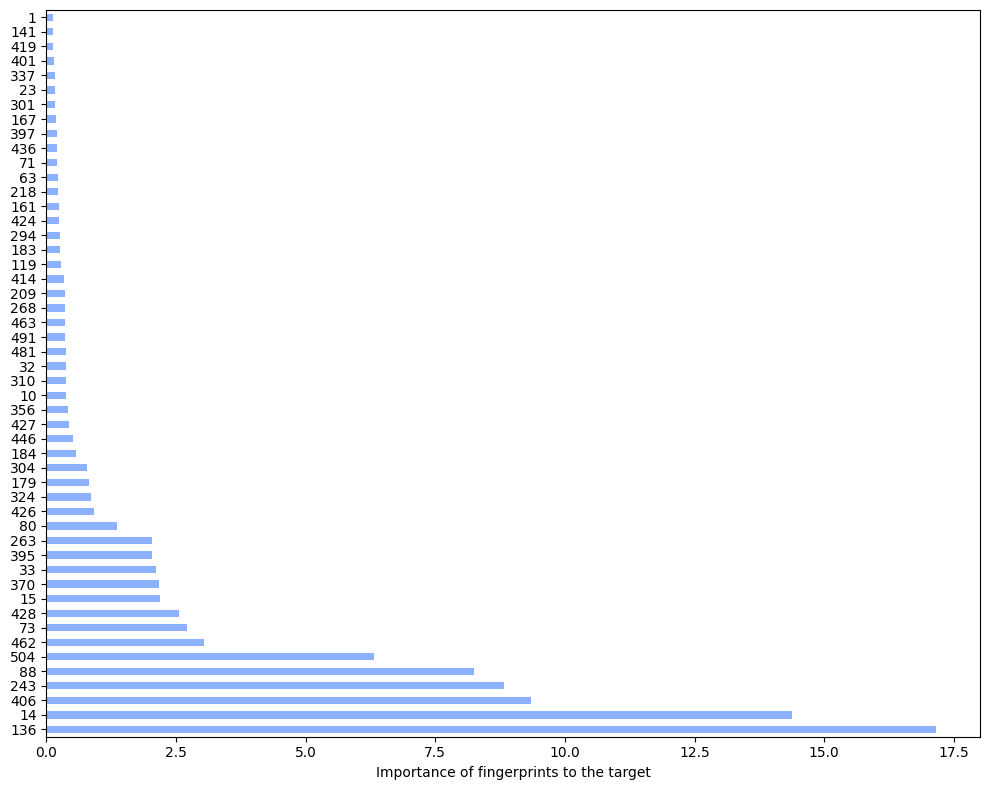

In [24]:
y_pred = cb_morgan.predict(X_test)

# Importance of features
fig = plt.figure(figsize=(10,8))
feat_imp_morgan = pd.Series(cb_morgan.get_feature_importance(), index=X.columns)
feat_imp_morgan.nlargest(50).plot(kind='barh', color = '#5A91FF', alpha=0.7)
plt.xlabel('Importance of fingerprints to the target')
plt.tight_layout()

In [25]:
importance_df_morgan = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feat_imp_morgan
})

# Sorting DataFrame by importance and choosing top-15 features
top_features_morgan = importance_df_morgan.sort_values(by='Importance', ascending=False).head(15)
top_features_morgan

,Feature,Importance
136,136,17.146460
14,14,14.370236
406,406,9.341657
243,243,8.817724
88,88,8.256126
504,504,6.321280
462,462,3.034783
73,73,2.712858
428,428,2.564704
15,15,2.186379


In [26]:
top_morgan = list(top_features_morgan["Feature"])

### Removal of frequently repeating values

In [27]:
Morgan_data = pd.concat([MF[top_morgan], DF_norm], axis = 1)

In [28]:
Morgan_data.head(3)

,136,14,406,243,88,504,462,73,428,15,...,VSA_EState9,SlogP_VSA2,PEOE_VSA9,SlogP_VSA4,MinEStateIndex,FpDensityMorgan2,FpDensityMorgan3,FpDensityMorgan1,VSA_EState5,Ka_mean
0,0,0,0,0,0,0,0,0,0,0,...,0.383244,0.095394,0.111125,0.0,0.904940,0.096990,0.243292,0.070404,0.062805,0.000510
1,0,0,0,0,0,0,0,1,0,1,...,0.784061,1.000000,1.000000,0.5,0.955733,0.070652,0.123547,0.098517,0.542489,0.441176
2,0,0,0,0,0,0,0,1,0,0,...,0.383244,0.095394,0.111125,0.5,0.918240,1.000000,0.968605,0.756356,0.546644,0.006274


In [29]:
for col in Morgan_data.columns:
       print(f'Unique values for {col}:\n{Morgan_data[col].value_counts()}\n')

Unique values for 136:
136
0    31
1     2
Name: count, dtype: int64

Unique values for 14:
14
0    31
1     2
Name: count, dtype: int64

Unique values for 406:
406
0    32
1     1
Name: count, dtype: int64

Unique values for 243:
243
0    32
1     1
Name: count, dtype: int64

Unique values for 88:
88
0    32
1     1
Name: count, dtype: int64

Unique values for 504:
504
0    32
1     1
Name: count, dtype: int64

Unique values for 462:
462
0    31
1     2
Name: count, dtype: int64

Unique values for 73:
73
0    28
1     5
Name: count, dtype: int64

Unique values for 428:
428
0    28
1     5
Name: count, dtype: int64

Unique values for 15:
15
0    32
1     1
Name: count, dtype: int64

Unique values for 370:
370
0    32
1     1
Name: count, dtype: int64

Unique values for 33:
33
1    18
0    15
Name: count, dtype: int64

Unique values for 395:
395
0    32
1     1
Name: count, dtype: int64

Unique values for 263:
263
0    29
1     4
Name: count, dtype: int64

Unique values for 80:
80
0    

In [30]:
def analyze_repetition(dataframe):
    # A list for headers of columns with high percentage repeating values
    high_repetition_columns = []

    # Chekcing all columns in DataFrame
    for col in dataframe.columns:
        # Getting quantity of repeating values in column
        value_counts = dataframe[col].value_counts(normalize=True)

        # Calculating the max percent of repeating values
        max_percentage = value_counts.max() * 100

        if max_percentage > 80:
            high_repetition_columns.append(col)

    return high_repetition_columns

In [31]:
analyze_repetition(Morgan_data)

[136, 14, 406, 243, 88, 504, 462, 73, 428, 15, 370, 395, 263]

### **Ready Dataset**



> Includes binding constants, molecular descriptors and fingerprints

In [32]:
MORGAN_data = Morgan_data.drop(analyze_repetition(Morgan_data), axis = 1)
MORGAN_data.head(3)

,33,80,SMR_VSA4,VSA_EState9,SlogP_VSA2,PEOE_VSA9,SlogP_VSA4,MinEStateIndex,FpDensityMorgan2,FpDensityMorgan3,FpDensityMorgan1,VSA_EState5,Ka_mean
0,0,0,0.0,0.383244,0.095394,0.111125,0.0,0.904940,0.096990,0.243292,0.070404,0.062805,0.000510
1,1,0,0.5,0.784061,1.000000,1.000000,0.5,0.955733,0.070652,0.123547,0.098517,0.542489,0.441176
2,0,0,0.5,0.383244,0.095394,0.111125,0.5,0.918240,1.000000,0.968605,0.756356,0.546644,0.006274


## Avalon Fingerprints

### Creation

In [33]:
df_avalon = []

for mol in FULL_df['mol']:
  gen_avalon = pyAvalonTools.GetAvalonFP(mol, nBits = 512)
  arr = np.zeros((0,), dtype = np.int8)
  DataStructs.ConvertToNumpyArray(gen_avalon, arr)
  df_avalon.append(arr)

AVALON = pd.concat([DF_norm["Ka_mean"], pd.DataFrame(df_avalon)], axis = 1)
AVALON.head(3)

,Ka_mean,0,1,2,3,4,5,6,7,8,...,502,503,504,505,506,507,508,509,510,511
0,0.000510,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.441176,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.006274,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Analysis

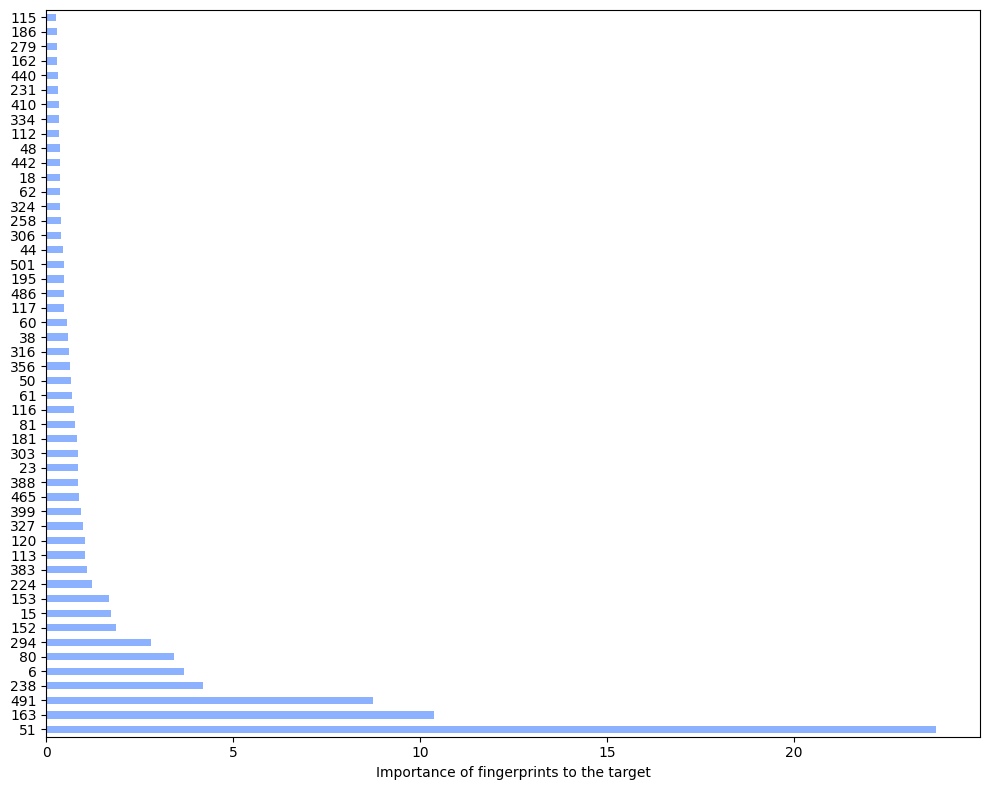

In [34]:
cb_av = CatBoostRegressor()
X = AVALON.drop(["Ka_mean"], axis = 1)[:]
y = AVALON["Ka_mean"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size=0.1, random_state=42)

cb_av.fit(X_train, y_train, verbose=0)

y_pred = cb_av.predict(X_test)

# Importance of features
fig = plt.figure(figsize=(10,8))
feat_imp_avalon = pd.Series(cb_av.get_feature_importance(), index=X.columns)
feat_imp_avalon.nlargest(50).plot(kind='barh', color = '#5A91FF', alpha=0.7)
plt.xlabel('Importance of fingerprints to the target')
plt.tight_layout()

In [35]:
importance_df_avalon = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feat_imp_avalon
})

# Sorting DataFrame by importance and choosing top-15 features
top_features_avalon = importance_df_avalon.sort_values(by='Importance', ascending=False).head(15)
top_avalon = list(top_features_avalon["Feature"])
top_features_avalon

,Feature,Importance
51,51,23.798489
163,163,10.376114
491,491,8.734192
238,238,4.194446
6,6,3.676403
80,80,3.422150
294,294,2.805583
152,152,1.869896
15,15,1.718028
153,153,1.670345


### Removal of frequently repeating values

In [36]:
Avalon_data = pd.concat([AVALON[top_avalon], DF_norm], axis = 1)
Avalon_data.head(3)

,51,163,491,238,6,80,294,152,15,153,...,VSA_EState9,SlogP_VSA2,PEOE_VSA9,SlogP_VSA4,MinEStateIndex,FpDensityMorgan2,FpDensityMorgan3,FpDensityMorgan1,VSA_EState5,Ka_mean
0,0,0,0,0,0,0,0,0,0,0,...,0.383244,0.095394,0.111125,0.0,0.904940,0.096990,0.243292,0.070404,0.062805,0.000510
1,1,1,1,0,0,0,0,1,1,1,...,0.784061,1.000000,1.000000,0.5,0.955733,0.070652,0.123547,0.098517,0.542489,0.441176
2,0,0,0,0,0,1,0,0,1,0,...,0.383244,0.095394,0.111125,0.5,0.918240,1.000000,0.968605,0.756356,0.546644,0.006274


In [37]:
for col in Avalon_data.columns:
       print(f'Unique values for {col}:\n{Avalon_data[col].value_counts()}\n')

Unique values for 51:
51
0    25
1     8
Name: count, dtype: int64

Unique values for 163:
163
0    28
1     5
Name: count, dtype: int64

Unique values for 491:
491
0    29
1     4
Name: count, dtype: int64

Unique values for 238:
238
0    32
1     1
Name: count, dtype: int64

Unique values for 6:
6
0    32
1     1
Name: count, dtype: int64

Unique values for 80:
80
0    25
1     8
Name: count, dtype: int64

Unique values for 294:
294
0    32
1     1
Name: count, dtype: int64

Unique values for 152:
152
0    30
1     3
Name: count, dtype: int64

Unique values for 15:
15
0    29
1     4
Name: count, dtype: int64

Unique values for 153:
153
0    26
1     7
Name: count, dtype: int64

Unique values for 224:
224
0    26
1     7
Name: count, dtype: int64

Unique values for 383:
383
0    19
1    14
Name: count, dtype: int64

Unique values for 113:
113
0    31
1     2
Name: count, dtype: int64

Unique values for 120:
120
0    28
1     5
Name: count, dtype: int64

Unique values for 327:
327
0  

In [38]:
analyze_repetition(Avalon_data)

[163, 491, 238, 6, 294, 152, 15, 113, 120, 327]

In [39]:
AVALON_data = Avalon_data.drop(analyze_repetition(Avalon_data), axis = 1)
AVALON_data.head(3)

,51,80,153,224,383,SMR_VSA4,VSA_EState9,SlogP_VSA2,PEOE_VSA9,SlogP_VSA4,MinEStateIndex,FpDensityMorgan2,FpDensityMorgan3,FpDensityMorgan1,VSA_EState5,Ka_mean
0,0,0,0,0,0,0.0,0.383244,0.095394,0.111125,0.0,0.904940,0.096990,0.243292,0.070404,0.062805,0.000510
1,1,0,1,0,0,0.5,0.784061,1.000000,1.000000,0.5,0.955733,0.070652,0.123547,0.098517,0.542489,0.441176
2,0,1,0,0,0,0.5,0.383244,0.095394,0.111125,0.5,0.918240,1.000000,0.968605,0.756356,0.546644,0.006274


In fact, the features of the Avalon Fingerprints DataFrame are identical to the Morgan ones. Both of these DataFrames don't contain any fingerprint features.

## PatternFingerprints

### Creation

In [40]:
df_pf = []

for mol in FULL_df['mol']:
  pf = Chem.rdmolops.PatternFingerprint(mol)
  arr = np.zeros((0,), dtype = np.int8)
  DataStructs.ConvertToNumpyArray(pf, arr)
  df_pf.append(arr)

PF = pd.concat([DF_norm["Ka_mean"], pd.DataFrame(df_pf)], axis = 1)
PF.sample(3)

,Ka_mean,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
31,3.724020e-04,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
15,1.029265e-03,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
26,2.254902e-07,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


### Analysis

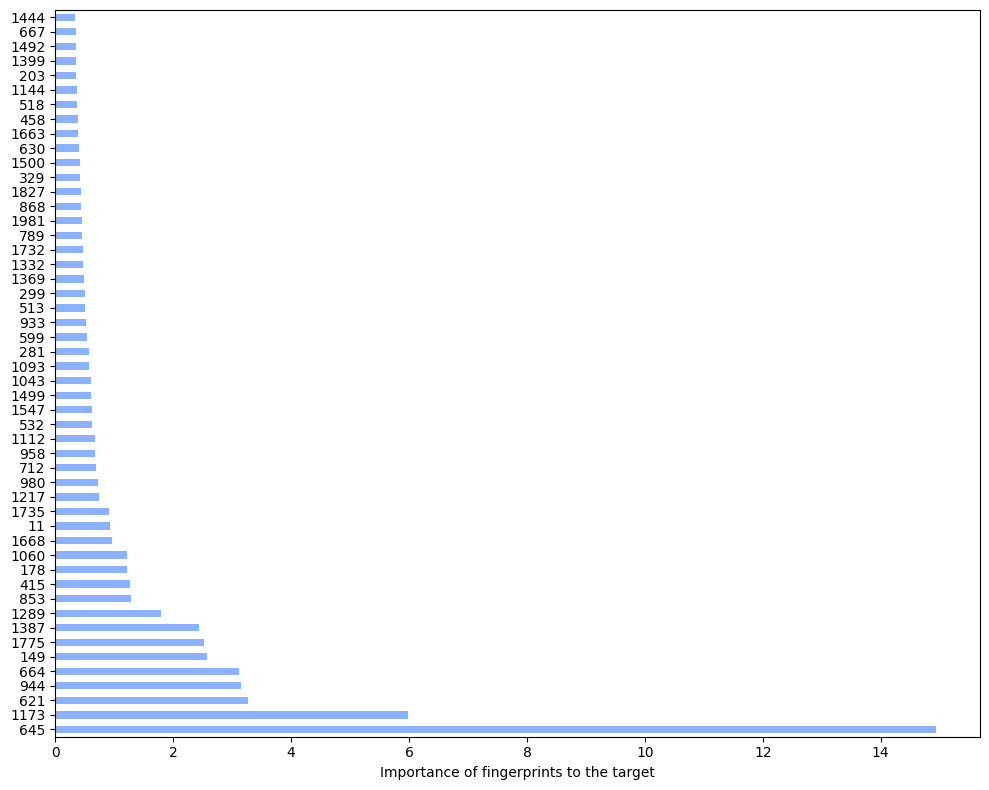

In [41]:
cb_pf = CatBoostRegressor()
X = PF.drop(["Ka_mean"], axis = 1)[:]
y = PF["Ka_mean"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size=0.1, random_state=42)

cb_pf.fit(X_train, y_train, verbose=0)

y_pred = cb_pf.predict(X_test)

# Importance of features
fig = plt.figure(figsize=(10,8))
feat_imp_pattern = pd.Series(cb_pf.get_feature_importance(), index=X.columns)
feat_imp_pattern.nlargest(50).plot(kind='barh', color = '#5A91FF', alpha=0.7)
plt.xlabel('Importance of fingerprints to the target')
plt.tight_layout()

In [42]:
importance_df_pattern = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feat_imp_pattern
})

# Sorting DataFrame by importance and choosing top-15 features
top_features_pattern = importance_df_pattern.sort_values(by='Importance', ascending=False).head(15)
top_pattern = list(top_features_pattern["Feature"])
top_features_pattern

,Feature,Importance
645,645,14.936514
1173,1173,5.987305
621,621,3.264208
944,944,3.147525
664,664,3.108744
149,149,2.566847
1775,1775,2.523034
1387,1387,2.440611
1289,1289,1.795816
853,853,1.290991


### Removal of frequently repeating values

In [43]:
Pattern_data = pd.concat([PF[top_pattern], DF_norm], axis = 1)

In [44]:
Pattern_data.head(3)

,645,1173,621,944,664,149,1775,1387,1289,853,...,VSA_EState9,SlogP_VSA2,PEOE_VSA9,SlogP_VSA4,MinEStateIndex,FpDensityMorgan2,FpDensityMorgan3,FpDensityMorgan1,VSA_EState5,Ka_mean
0,0,0,0,0,0,0,0,0,0,0,...,0.383244,0.095394,0.111125,0.0,0.904940,0.096990,0.243292,0.070404,0.062805,0.000510
1,0,0,0,1,1,1,0,0,0,1,...,0.784061,1.000000,1.000000,0.5,0.955733,0.070652,0.123547,0.098517,0.542489,0.441176
2,0,1,1,0,0,0,0,0,0,0,...,0.383244,0.095394,0.111125,0.5,0.918240,1.000000,0.968605,0.756356,0.546644,0.006274


In [45]:
for col in Pattern_data.columns:
       print(f'Unique values for {col}:\n{Pattern_data[col].value_counts()}\n')

Unique values for 645:
645
0    31
1     2
Name: count, dtype: int64

Unique values for 1173:
1173
0    31
1     2
Name: count, dtype: int64

Unique values for 621:
621
0    31
1     2
Name: count, dtype: int64

Unique values for 944:
944
1    19
0    14
Name: count, dtype: int64

Unique values for 664:
664
1    19
0    14
Name: count, dtype: int64

Unique values for 149:
149
1    19
0    14
Name: count, dtype: int64

Unique values for 1775:
1775
0    30
1     3
Name: count, dtype: int64

Unique values for 1387:
1387
0    18
1    15
Name: count, dtype: int64

Unique values for 1289:
1289
0    23
1    10
Name: count, dtype: int64

Unique values for 853:
853
1    20
0    13
Name: count, dtype: int64

Unique values for 415:
415
0    25
1     8
Name: count, dtype: int64

Unique values for 178:
178
1    21
0    12
Name: count, dtype: int64

Unique values for 1060:
1060
1    19
0    14
Name: count, dtype: int64

Unique values for 1668:
1668
0    27
1     6
Name: count, dtype: int64

Unique v

In [46]:
analyze_repetition(Pattern_data)

[645, 1173, 621, 1775, 1668]

In [47]:
PATTERN_data = Pattern_data.drop(analyze_repetition(Pattern_data), axis = 1)
PATTERN_data.head(3)

,944,664,149,1387,1289,853,415,178,1060,11,...,VSA_EState9,SlogP_VSA2,PEOE_VSA9,SlogP_VSA4,MinEStateIndex,FpDensityMorgan2,FpDensityMorgan3,FpDensityMorgan1,VSA_EState5,Ka_mean
0,0,0,0,0,0,0,0,0,0,0,...,0.383244,0.095394,0.111125,0.0,0.904940,0.096990,0.243292,0.070404,0.062805,0.000510
1,1,1,1,0,0,1,1,1,1,1,...,0.784061,1.000000,1.000000,0.5,0.955733,0.070652,0.123547,0.098517,0.542489,0.441176
2,0,0,0,0,0,0,0,0,0,0,...,0.383244,0.095394,0.111125,0.5,0.918240,1.000000,0.968605,0.756356,0.546644,0.006274


According to the previous 3 records: if the last of the top-15 fingerprint features tends to zero, the fingerprints are removed from the dataset

## AtomPairs Fingerprints

### Creation

In [48]:
df_atom = []

apgen = rdFingerprintGenerator.GetAtomPairGenerator(fpSize=512)
for mol in FULL_df['mol']:
  atomgen = apgen.GetFingerprint(mol)
  arr = np.zeros((0,), dtype = np.int8)
  DataStructs.ConvertToNumpyArray(atomgen, arr)
  df_atom.append(arr)

ATOMPAIRS = pd.concat([DF_norm["Ka_mean"], pd.DataFrame(df_atom)], axis = 1)
ATOMPAIRS.sample(3)

,Ka_mean,0,1,2,3,4,5,6,7,8,...,502,503,504,505,506,507,508,509,510,511
10,0.000323,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.000228,1,1,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0
0,0.000510,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Analysis

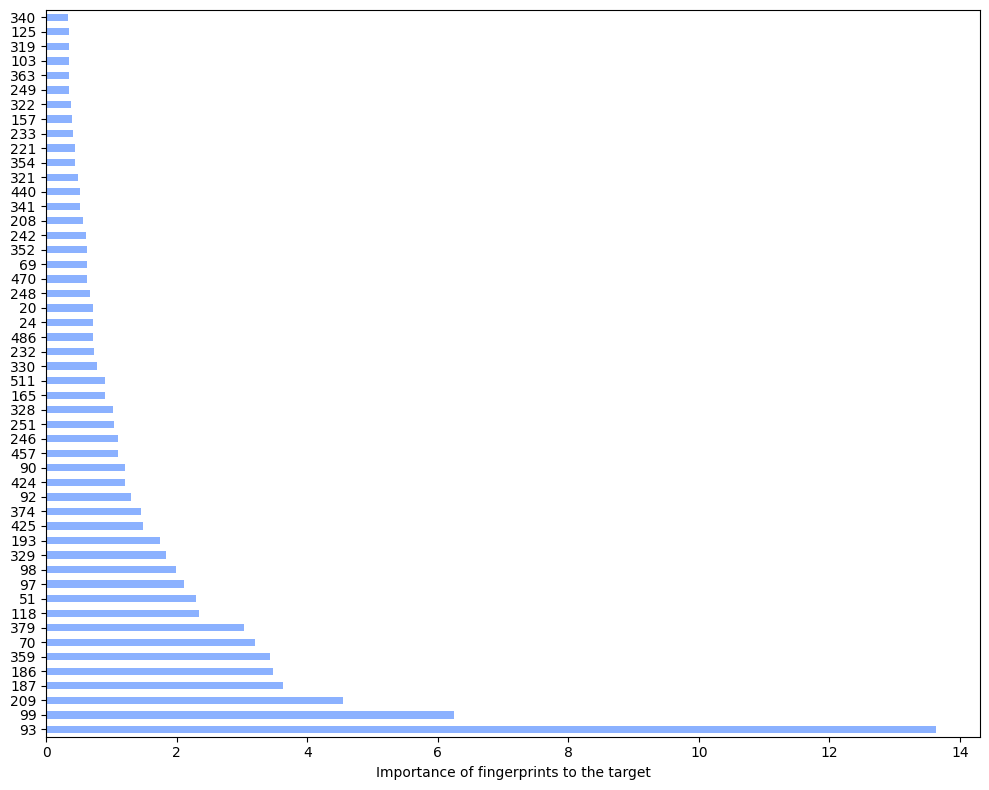

In [49]:
cb_atom = CatBoostRegressor()
X = ATOMPAIRS.drop(["Ka_mean"], axis = 1)[:]
y = ATOMPAIRS["Ka_mean"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size=0.1, random_state=42)

cb_atom.fit(X_train, y_train, verbose=0)

y_pred = cb_atom.predict(X_test)

# Importance of features
fig = plt.figure(figsize=(10,8))
feat_imp_atompairs = pd.Series(cb_atom.get_feature_importance(), index=X.columns)
feat_imp_atompairs.nlargest(50).plot(kind='barh', color = '#5A91FF', alpha=0.7)
plt.xlabel('Importance of fingerprints to the target')
plt.tight_layout()

In [50]:
importance_df_atompairs = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feat_imp_atompairs
})

# Sorting DataFrame by importance and choosing top-15 features
top_features_atompairs = importance_df_atompairs.sort_values(by='Importance', ascending=False).head(15)
top_atompairs = list(top_features_atompairs["Feature"])
top_features_atompairs

,Feature,Importance
93,93,13.626470
99,99,6.245395
209,209,4.550216
187,187,3.630460
186,186,3.467126
359,359,3.427798
70,70,3.203779
379,379,3.031281
118,118,2.346644
51,51,2.287758


### Removal of frequently repeating values

In [51]:
AtomPairs_data = pd.concat([ATOMPAIRS[top_atompairs], DF_norm], axis = 1)
AtomPairs_data.head(3)

,93,99,209,187,186,359,70,379,118,51,...,VSA_EState9,SlogP_VSA2,PEOE_VSA9,SlogP_VSA4,MinEStateIndex,FpDensityMorgan2,FpDensityMorgan3,FpDensityMorgan1,VSA_EState5,Ka_mean
0,0,0,0,0,0,0,0,0,0,0,...,0.383244,0.095394,0.111125,0.0,0.904940,0.096990,0.243292,0.070404,0.062805,0.000510
1,1,0,0,0,0,0,0,0,0,1,...,0.784061,1.000000,1.000000,0.5,0.955733,0.070652,0.123547,0.098517,0.542489,0.441176
2,0,0,0,0,0,0,0,0,0,0,...,0.383244,0.095394,0.111125,0.5,0.918240,1.000000,0.968605,0.756356,0.546644,0.006274


In [52]:
for col in AtomPairs_data.columns:
       print(f'Unique values for {col}:\n{AtomPairs_data[col].value_counts()}\n')

Unique values for 93:
93
0    29
1     4
Name: count, dtype: int64

Unique values for 99:
99
0    32
1     1
Name: count, dtype: int64

Unique values for 209:
209
0    26
1     7
Name: count, dtype: int64

Unique values for 187:
187
0    32
1     1
Name: count, dtype: int64

Unique values for 186:
186
0    32
1     1
Name: count, dtype: int64

Unique values for 359:
359
0    32
1     1
Name: count, dtype: int64

Unique values for 70:
70
0    30
1     3
Name: count, dtype: int64

Unique values for 379:
379
0    32
1     1
Name: count, dtype: int64

Unique values for 118:
118
0    32
1     1
Name: count, dtype: int64

Unique values for 51:
51
0    29
1     4
Name: count, dtype: int64

Unique values for 97:
97
0    32
1     1
Name: count, dtype: int64

Unique values for 98:
98
0    32
1     1
Name: count, dtype: int64

Unique values for 329:
329
0    28
1     5
Name: count, dtype: int64

Unique values for 193:
193
0    24
1     9
Name: count, dtype: int64

Unique values for 425:
425
0    

In [53]:
analyze_repetition(AtomPairs_data)

[93, 99, 187, 186, 359, 70, 379, 118, 51, 97, 98, 329, 425]

### **Ready Dataset**



> Includes binding constants, molecular descriptors and fingerprints

In [54]:
ATOM_data = AtomPairs_data.drop(analyze_repetition(AtomPairs_data), axis = 1)
ATOM_data.to_csv("AtomPairsData++.csv")
ATOM_data.head(3)

,209,193,SMR_VSA4,VSA_EState9,SlogP_VSA2,PEOE_VSA9,SlogP_VSA4,MinEStateIndex,FpDensityMorgan2,FpDensityMorgan3,FpDensityMorgan1,VSA_EState5,Ka_mean
0,0,0,0.0,0.383244,0.095394,0.111125,0.0,0.904940,0.096990,0.243292,0.070404,0.062805,0.000510
1,0,0,0.5,0.784061,1.000000,1.000000,0.5,0.955733,0.070652,0.123547,0.098517,0.542489,0.441176
2,0,0,0.5,0.383244,0.095394,0.111125,0.5,0.918240,1.000000,0.968605,0.756356,0.546644,0.006274


## TopologicalTorsionGenerator

### Creation

In [55]:
df_ttf = []

ttfgen = rdFingerprintGenerator.GetTopologicalTorsionGenerator(fpSize=512)
for mol in FULL_df['mol']:
  ttf = ttfgen.GetFingerprint(mol)
  arr = np.array(ttf)
  df_ttf.append(arr)

TTF = pd.concat([DF_norm["Ka_mean"], pd.DataFrame(df_ttf)], axis = 1)
TTF.sample(3)

,Ka_mean,0,1,2,3,4,5,6,7,8,...,502,503,504,505,506,507,508,509,510,511
2,0.006274,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0.000510,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0.000005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Analysis

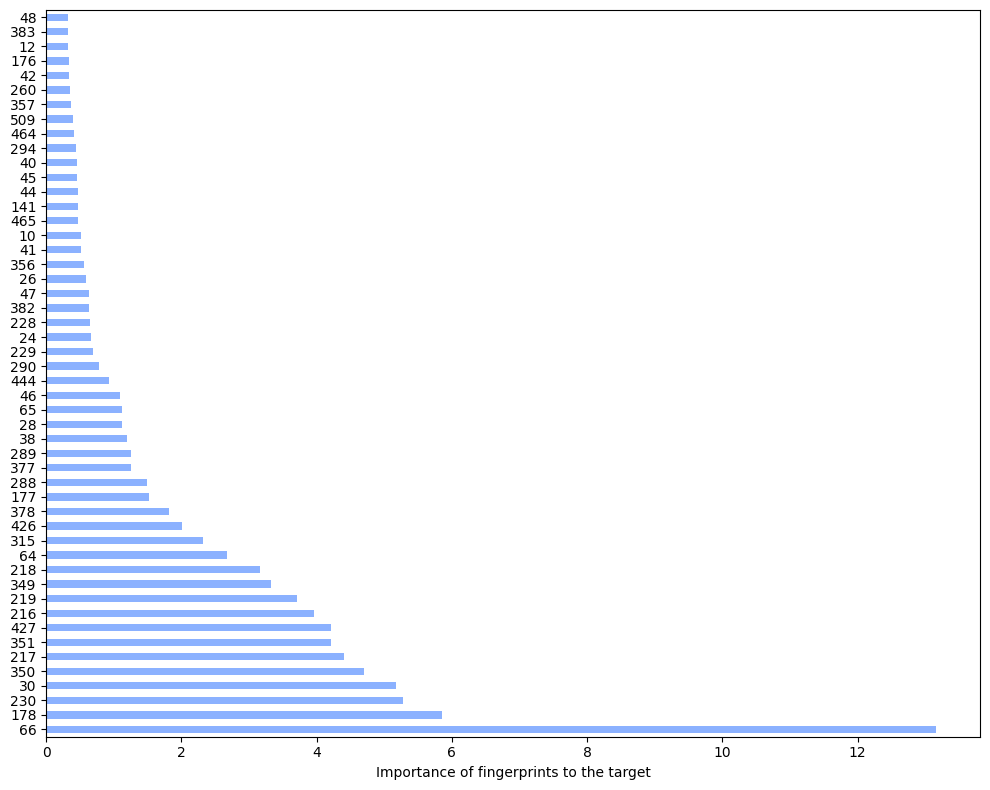

In [56]:
cb_ttf = CatBoostRegressor()
X = TTF.drop(["Ka_mean"], axis = 1)[:]
y = TTF["Ka_mean"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size=0.1, random_state=42)

cb_ttf.fit(X_train, y_train, verbose=0)

y_pred = cb_ttf.predict(X_test)

# Importance of features
fig = plt.figure(figsize=(10,8))
feat_imp_ttf = pd.Series(cb_ttf.get_feature_importance(), index=X.columns)
feat_imp_ttf.nlargest(50).plot(kind='barh', color = '#5A91FF', alpha=0.7)
plt.xlabel('Importance of fingerprints to the target')
plt.tight_layout()

In [57]:
importance_df_ttf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feat_imp_ttf
})

# Sorting DataFrame by importance and choosing top-15 features
top_features_ttf = importance_df_ttf.sort_values(by='Importance', ascending=False).head(15)
top_ttf = list(top_features_ttf["Feature"])
top_features_ttf

,Feature,Importance
66,66,13.153049
178,178,5.856872
230,230,5.279668
30,30,5.171006
350,350,4.706163
217,217,4.404345
351,351,4.214590
427,427,4.207607
216,216,3.967208
219,219,3.705167


### Removal of frequently repeating values

In [58]:
TopTors_data = pd.concat([TTF[top_ttf], DF_norm], axis = 1)
TopTors_data.head(3)

,66,178,230,30,350,217,351,427,216,219,...,VSA_EState9,SlogP_VSA2,PEOE_VSA9,SlogP_VSA4,MinEStateIndex,FpDensityMorgan2,FpDensityMorgan3,FpDensityMorgan1,VSA_EState5,Ka_mean
0,0,0,0,0,0,0,0,0,0,0,...,0.383244,0.095394,0.111125,0.0,0.904940,0.096990,0.243292,0.070404,0.062805,0.000510
1,0,0,0,1,0,0,0,0,0,0,...,0.784061,1.000000,1.000000,0.5,0.955733,0.070652,0.123547,0.098517,0.542489,0.441176
2,0,0,0,0,0,0,0,0,0,0,...,0.383244,0.095394,0.111125,0.5,0.918240,1.000000,0.968605,0.756356,0.546644,0.006274


In [59]:
for col in TopTors_data.columns:
       print(f'Unique values for {col}:\n{TopTors_data[col].value_counts()}\n')

Unique values for 66:
66
0    31
1     2
Name: count, dtype: int64

Unique values for 178:
178
0    27
1     6
Name: count, dtype: int64

Unique values for 230:
230
0    30
1     3
Name: count, dtype: int64

Unique values for 30:
30
0    28
1     5
Name: count, dtype: int64

Unique values for 350:
350
0    32
1     1
Name: count, dtype: int64

Unique values for 217:
217
0    32
1     1
Name: count, dtype: int64

Unique values for 351:
351
0    32
1     1
Name: count, dtype: int64

Unique values for 427:
427
0    32
1     1
Name: count, dtype: int64

Unique values for 216:
216
0    32
1     1
Name: count, dtype: int64

Unique values for 219:
219
0    32
1     1
Name: count, dtype: int64

Unique values for 349:
349
0    32
1     1
Name: count, dtype: int64

Unique values for 218:
218
0    32
1     1
Name: count, dtype: int64

Unique values for 64:
64
0    29
1     4
Name: count, dtype: int64

Unique values for 315:
315
0    31
1     2
Name: count, dtype: int64

Unique values for 426:
426

In [60]:
analyze_repetition(TopTors_data)

[66, 178, 230, 30, 350, 217, 351, 427, 216, 219, 349, 218, 64, 315, 426]

### **Ready Dataset**



> Includes binding constants, molecular descriptors and fingerprints

In [61]:
TTF_data = TopTors_data.drop(analyze_repetition(TopTors_data), axis = 1)
TTF_data.head(3)

,SMR_VSA4,VSA_EState9,SlogP_VSA2,PEOE_VSA9,SlogP_VSA4,MinEStateIndex,FpDensityMorgan2,FpDensityMorgan3,FpDensityMorgan1,VSA_EState5,Ka_mean
0,0.0,0.383244,0.095394,0.111125,0.0,0.904940,0.096990,0.243292,0.070404,0.062805,0.000510
1,0.5,0.784061,1.000000,1.000000,0.5,0.955733,0.070652,0.123547,0.098517,0.542489,0.441176
2,0.5,0.383244,0.095394,0.111125,0.5,0.918240,1.000000,0.968605,0.756356,0.546644,0.006274


Again the same dataset such as Morgan Dataset

# Correlation matrixes for all datasets

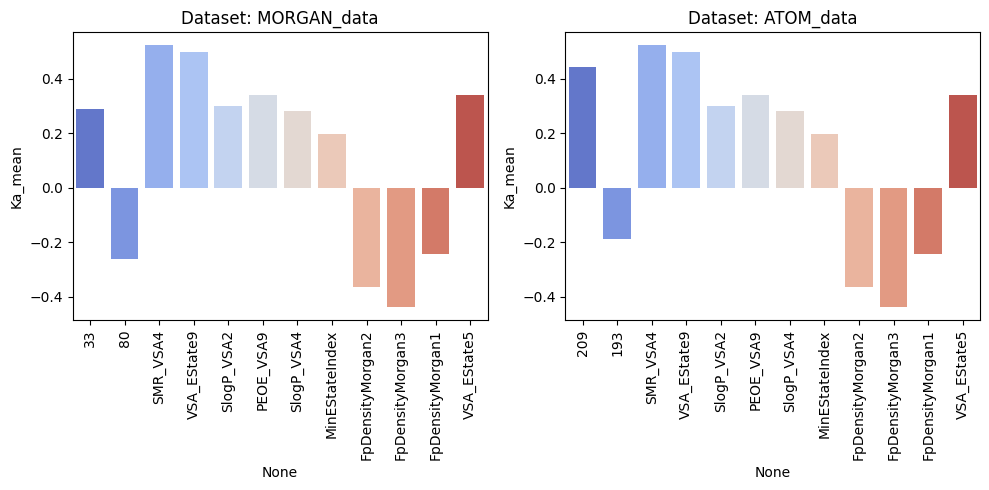

In [62]:
datasets = [
    ('MORGAN_data', MORGAN_data),
    ('ATOM_data', ATOM_data)
]

target_column = 'Ka_mean'

plt.figure(figsize=(10, 5))

for i, (name, df) in enumerate(datasets):
    if target_column not in df.columns:
        print(f"Target column '{target_column}' is missed in {name}.")
        continue  # Skip this dataset if the target column is missed

    # Calculating correlation
    correlation_matrix = df.corr()

    # Checking if there is a target column in the correlation matrix
    if target_column not in correlation_matrix.columns:
        print(f"Column '{target_column}' missed in correlation for {name}.")
        continue

    # Getting correlations with target column
    target_correlation = correlation_matrix[target_column]

    # Building barplot only for features which are different from target
    features = target_correlation.index[target_correlation.index != target_column]

    plt.subplot(1, len(datasets), i + 1)
    sns.barplot(x=features, y=target_correlation[features],  palette='coolwarm')
    plt.xticks(rotation=90)
    plt.title(f'Dataset: {name}')

plt.tight_layout()
plt.show()

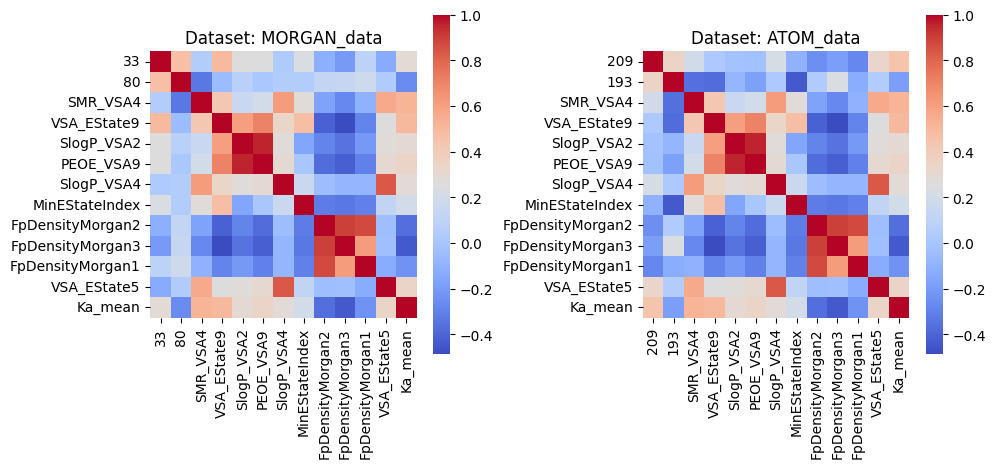

In [63]:
datasets = [
    ('MORGAN_data', MORGAN_data),
    ('ATOM_data', ATOM_data)
]

plt.figure(figsize=(10, 10))

for i, (name, df) in enumerate(datasets):
    # Calculating correlation
    correlation_matrix = df.corr()

    # Creating a plot
    plt.subplot(2, 2, i + 1)

    # Vizualization of heatmap
    sns.heatmap(correlation_matrix, cmap='coolwarm', square=True, cbar_kws={'shrink': .8})
    plt.title(f'Dataset: {name}')


plt.tight_layout()
plt.show()

Thus, the dataset ATOM_data was the most correlated with the target metric in the WP6++ dataset

In [64]:
ATOM_data.to_csv("AtomPairsData++.csv")